In [ ]:
print("first code entry")

first code entry


This data set is relating features to determine if a person prefers the beach or the mountains. This data set is from kaggle. There are 52444 entries, with no missing data.

The features are
"

**Age:** Age of the individual (numerical).

**Gender:** Gender identity of the individual (categorical: male, female, non-binary).

**Income:** Annual income of the individual (numerical).

**Education Level:** Highest level of education attained (categorical: high school, bachelor, master, doctorate).

**Travel Frequency:** Number of vacations taken per year (numerical).

**Preferred Activities:** Activities preferred by individuals during vacations (categorical: hiking, swimming, skiing, sunbathing).

**Vacation Budget:** Budget allocated for vacations (numerical).

**Location:** Type of residence (categorical: urban, suburban, rural).

**Proximity to Mountains:** Distance from the nearest mountains (numerical, in miles).

**Proximity to Beaches:** Distance from the nearest beaches (numerical, in miles).

**Favorite Season:** Preferred season for vacations (categorical: summer, winter, spring, fall).

**Pets:** Indicates whether the individual owns pets (binary: 0 = No, 1 = Yes).

**Environmental Concerns:** Indicates whether the individual has environmental concerns (binary: 0 = No, 1 = Yes).
"
- https://www.kaggle.com/datasets/jahnavipaliwal/mountains-vs-beaches-preference?select=mountains_vs_beaches_preferences.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [3]:
data = pd.read_csv('/content/mountains_vs_beaches_preferences.csv')
df = pd.DataFrame(data)
print("This is the data set of 13 features and is related to prefernce of either spending time the mountian 1, or the beach 0")
display(df.head())
display(df.describe())
#1 represents mountain
#0 for beach


This is the data set of 13 features and is related to prefernce of either spending time the mountian 1, or the beach 0


,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


My Hypothesis is that the **Preferred_Activities** feature will determine if someone wants to go to the beach or the mountains. If the favorite activity is sunbathing or swimming people would want to go to the beach. If the favorite activity is hiking or skiing people would want to go to the mountains.

> Add blockquote



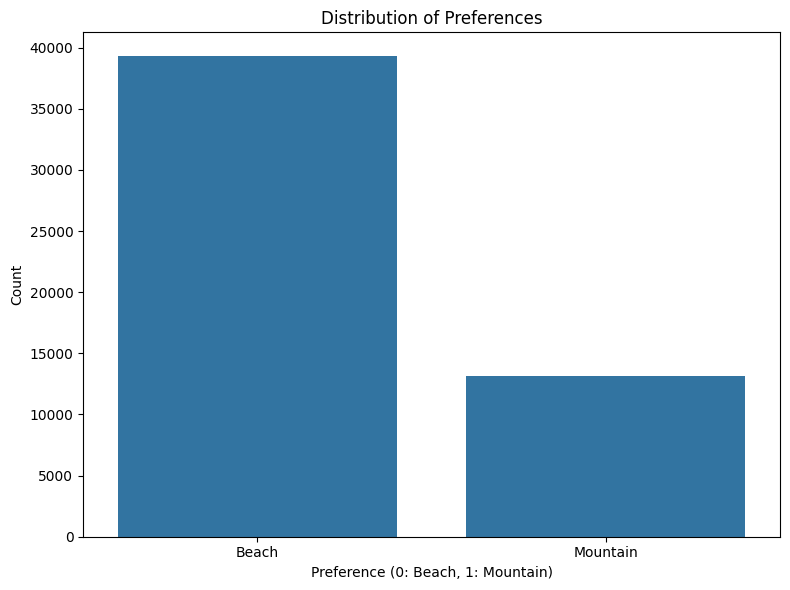

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.countplot(x='Preference', data=df)

plt.title('Distribution of Preferences')
plt.xlabel('Preference (0: Beach, 1: Mountain)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Beach', 'Mountain'])  # Set x-axis tick labels
plt.tight_layout()
plt.show()

It this data set more people prefer to go to the beach than the mountains.with 74.9 % choose the Beach and 25.07 % choose the Mountains. But the question is what makes an individual want to **go to the Beaches or the Mountains.**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_preference_bar_charts(df, column_name, num_bins=None):
    """
    Creates two bar charts, one for mountain preference and one for beach preference,
    showing the distribution of a feature with counts on top of bars.

    Args:
        df: The Pandas DataFrame containing the data.
        column_name: The name of the column to plot.
        num_bins: The number of bins to use for numerical features (optional).
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for preference, ax in zip([0, 1], axes):
        preference_df = df[df['Preference'] == preference]

        if num_bins is not None and df[column_name].dtype in [np.int64, np.float64]:
            # Bin the values directly within the groupby operation
            bin_edges = np.linspace(df[column_name].min(), df[column_name].max(), num_bins + 1)
            labels = [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(num_bins)]

            grouped_data = preference_df.groupby(pd.cut(preference_df[column_name], bins=bin_edges, labels=labels, include_lowest=True), observed=False).size()

        else:
            grouped_data = preference_df.groupby(column_name, observed=False)[column_name].count()

        bars = ax.bar(grouped_data.index, grouped_data.values)
        ax.set_xlabel(column_name)
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {column_name} for Preference {preference} ({"Beach" if preference == 0 else "Mountain"})')
        ax.tick_params(axis='x', labelrotation=45)

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2., height + 0.1, height, ha="center")

    plt.tight_layout()
    plt.show()

The following Bar Charts shows the count of a feature when the Preference is Beaches and when the Preference is the Mountains. Since Beaches has more entries in the data set, the count will be much larger than when the Preference is the Mountain. The analysis will focus on ratios and not solely on individual feature count values.

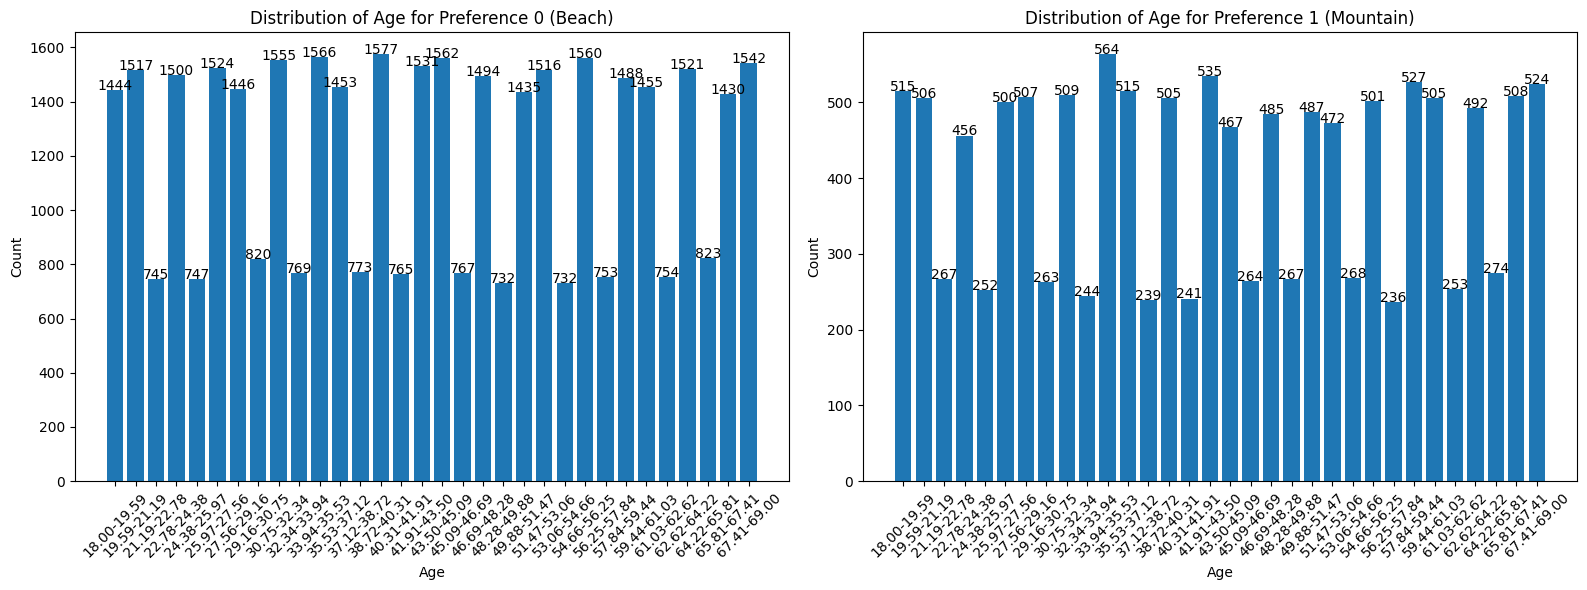

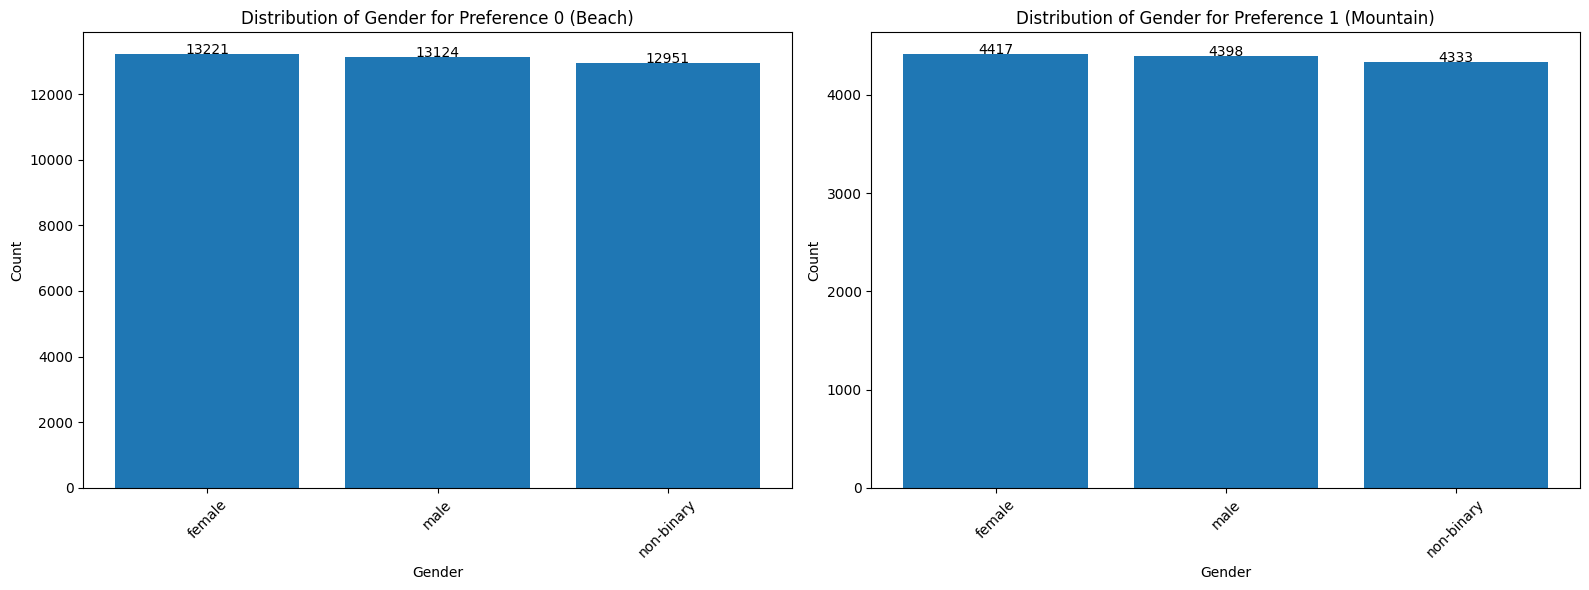

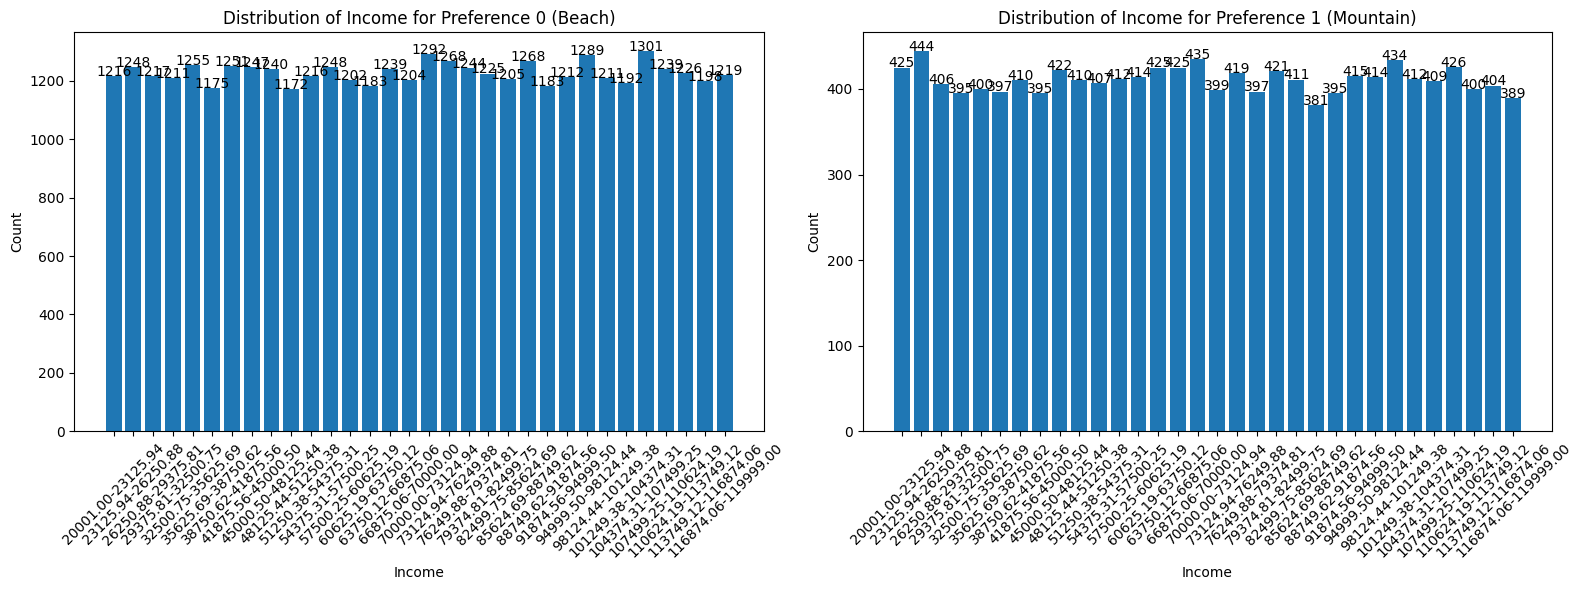

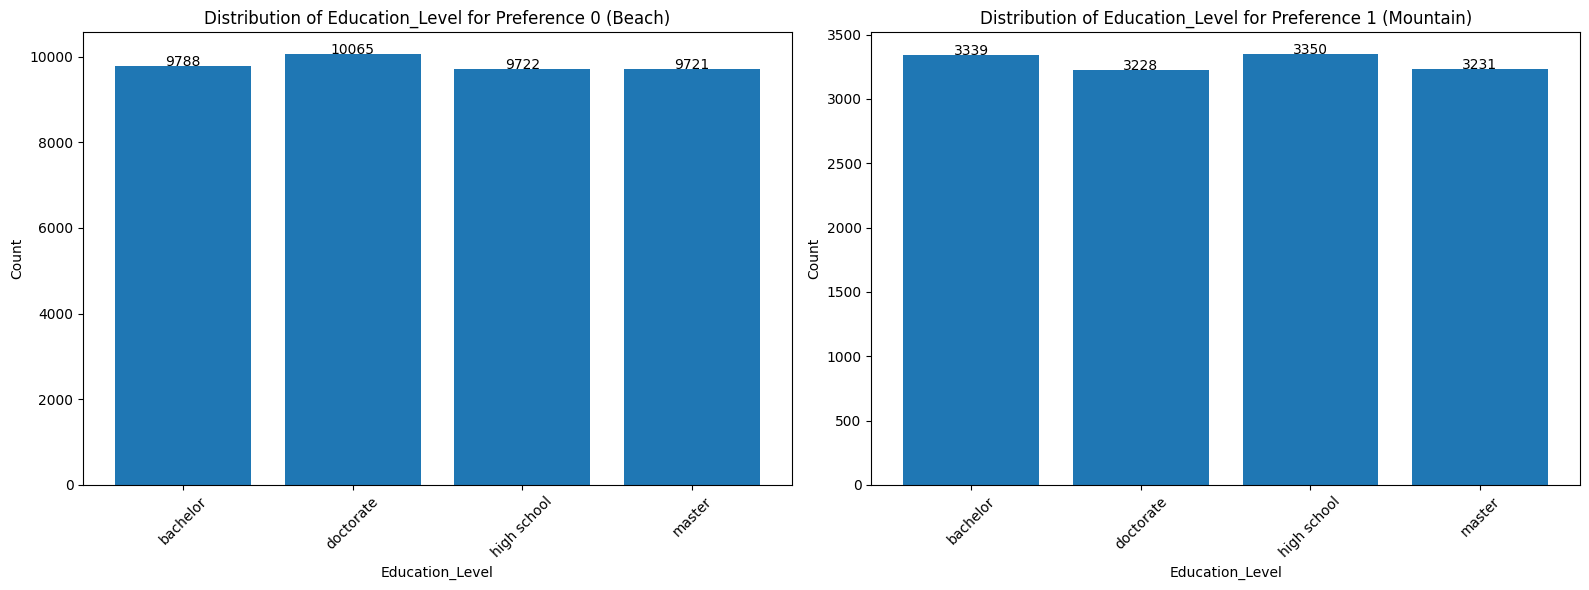

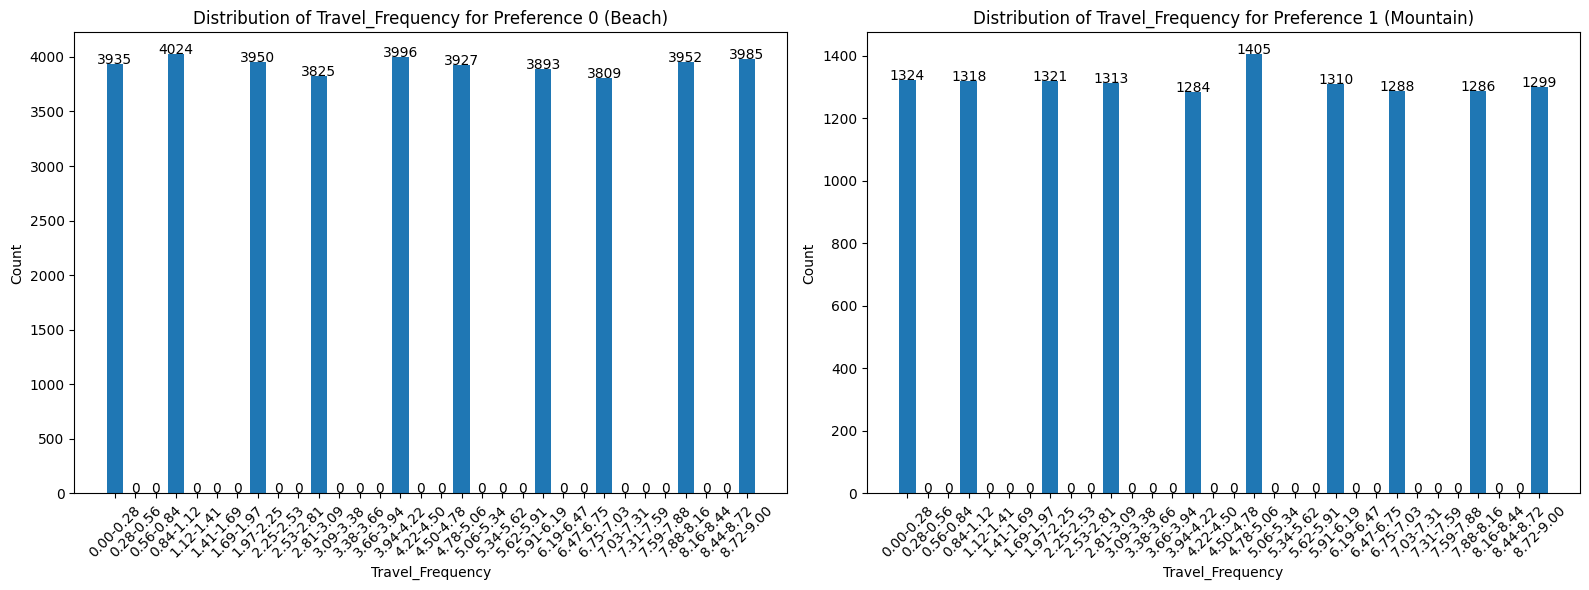

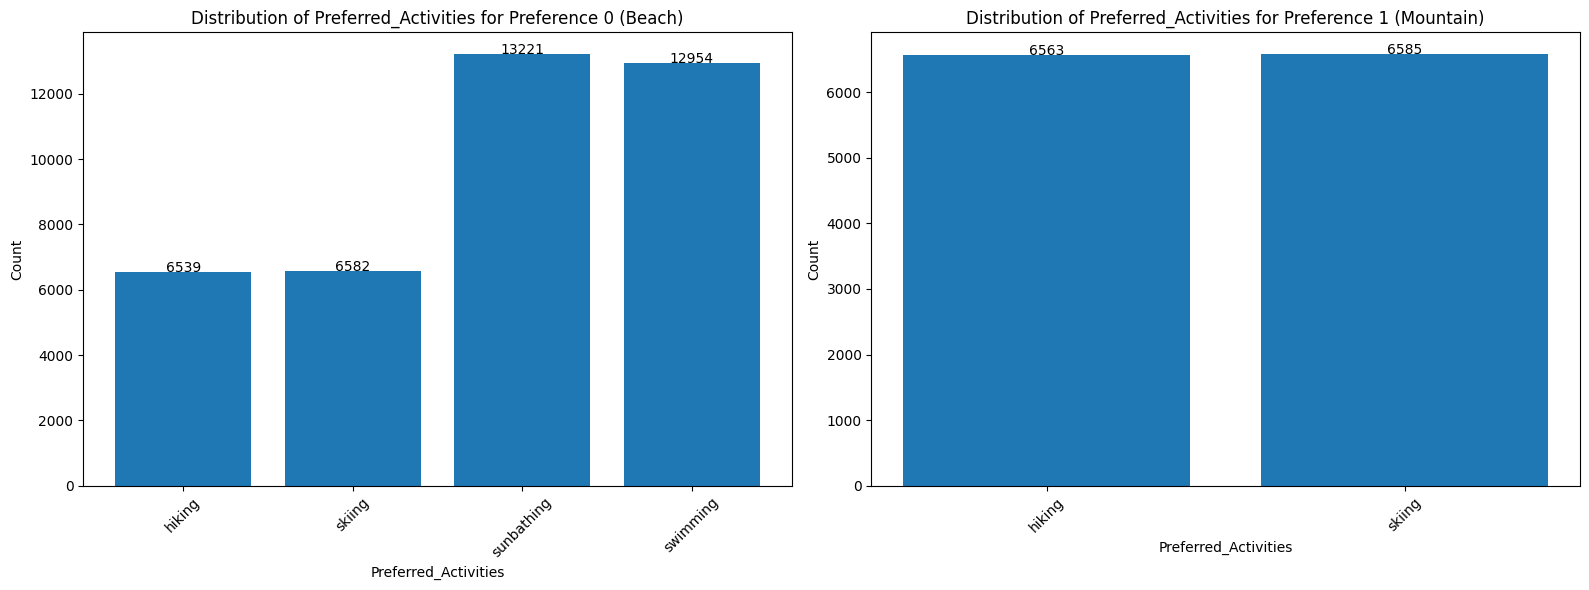

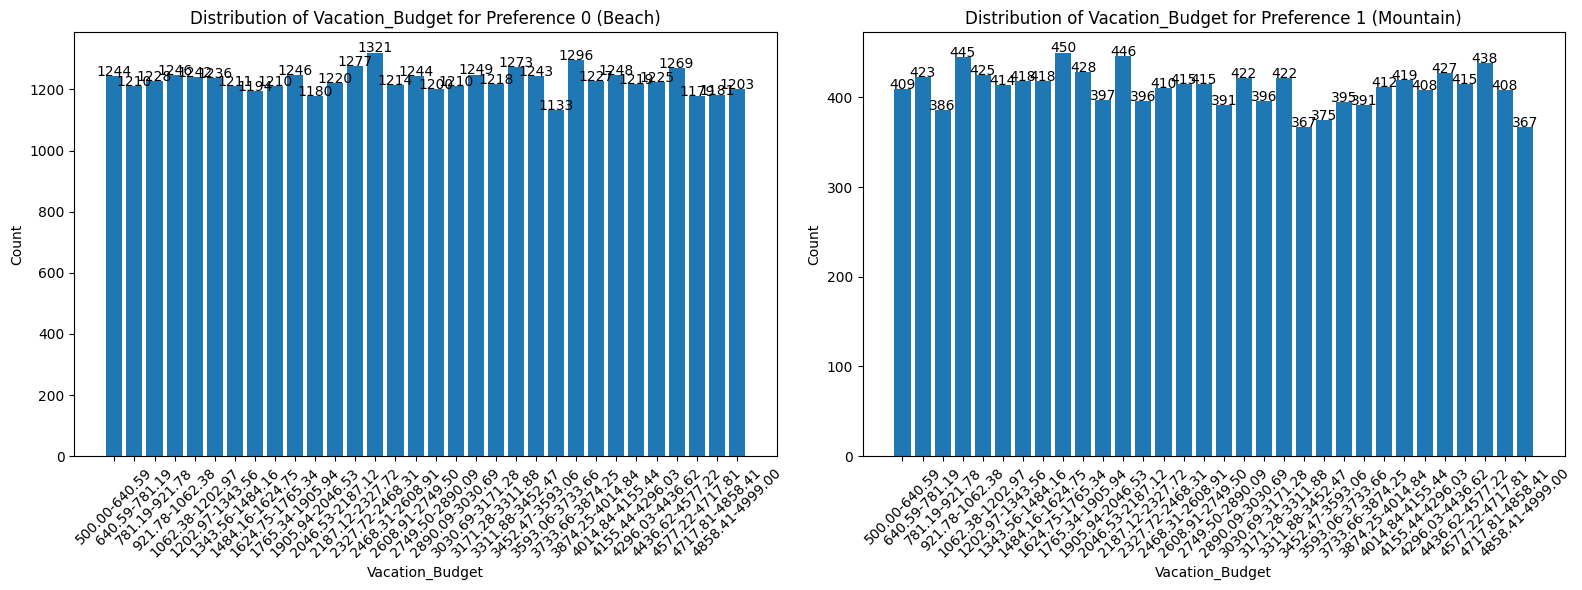

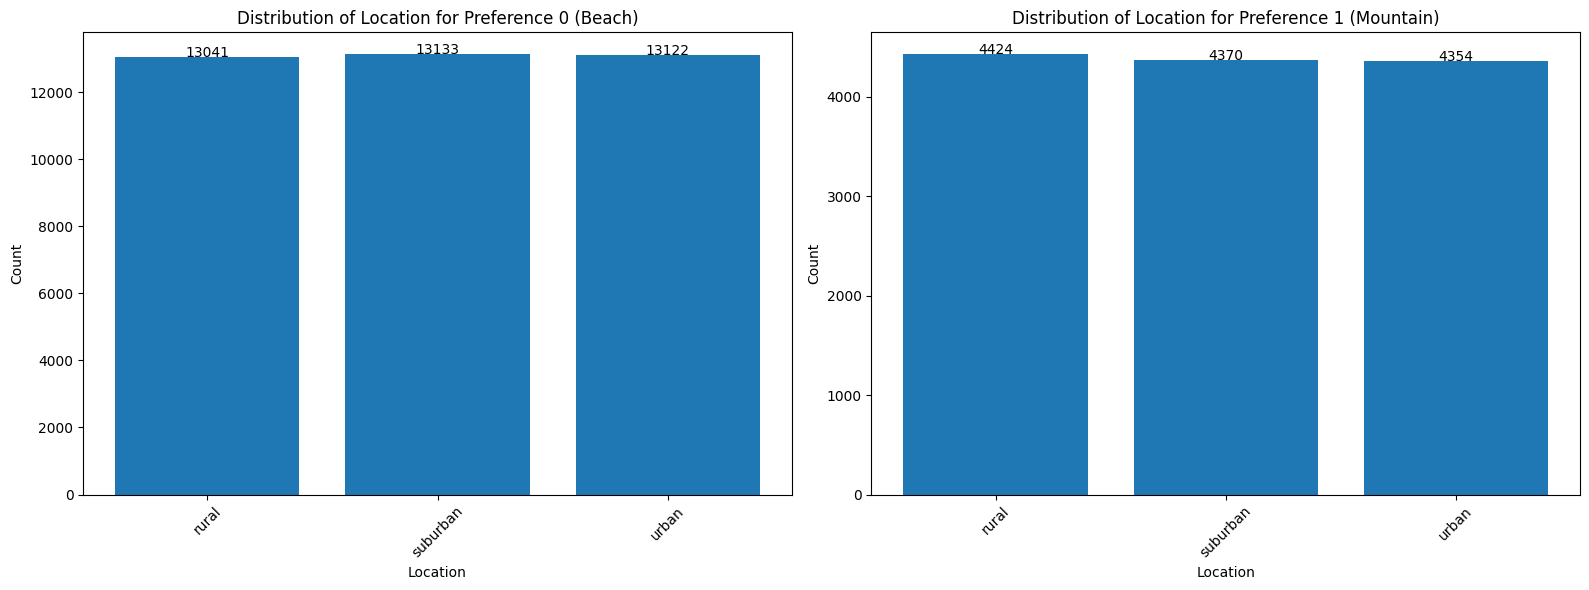

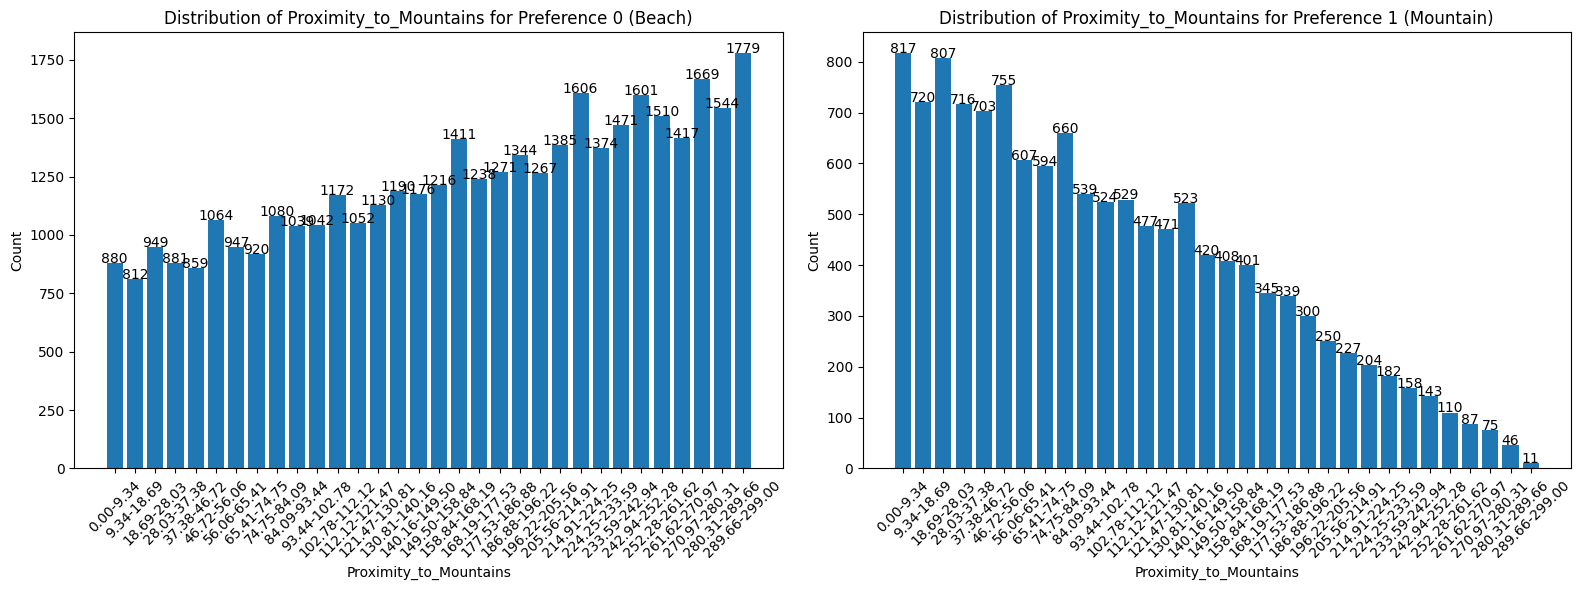

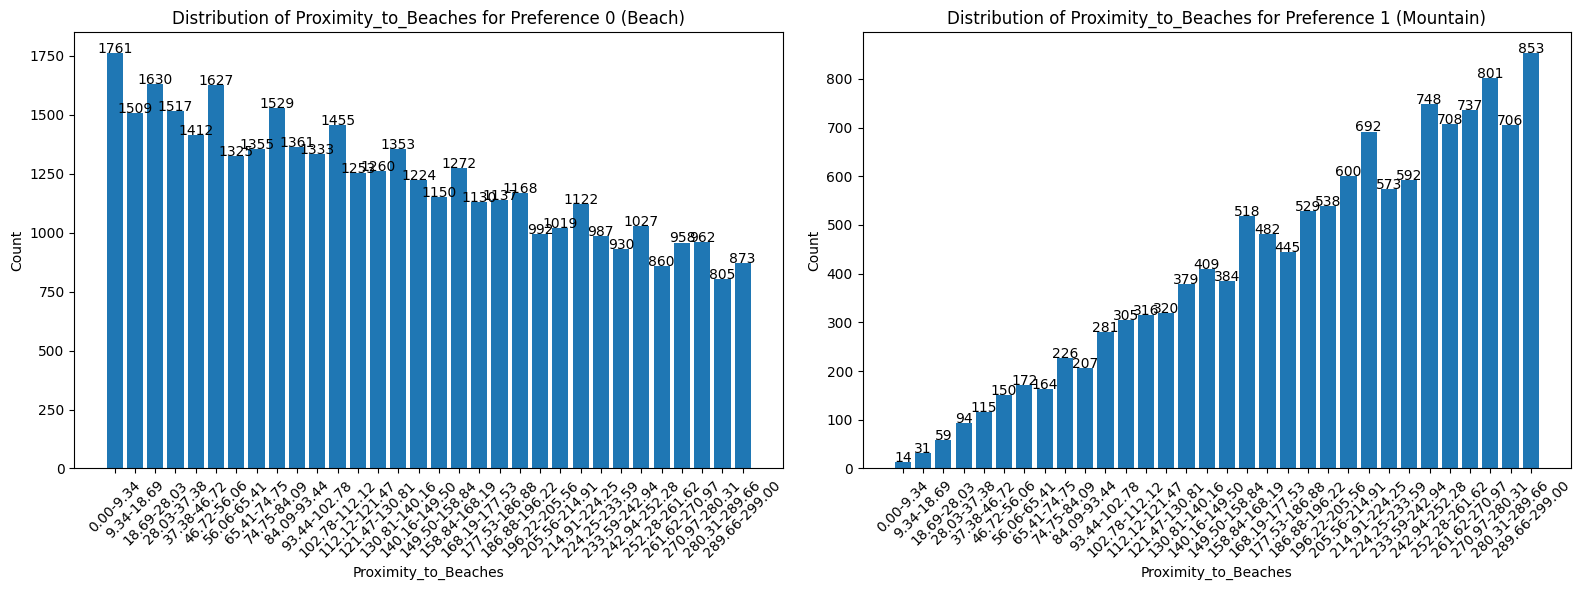

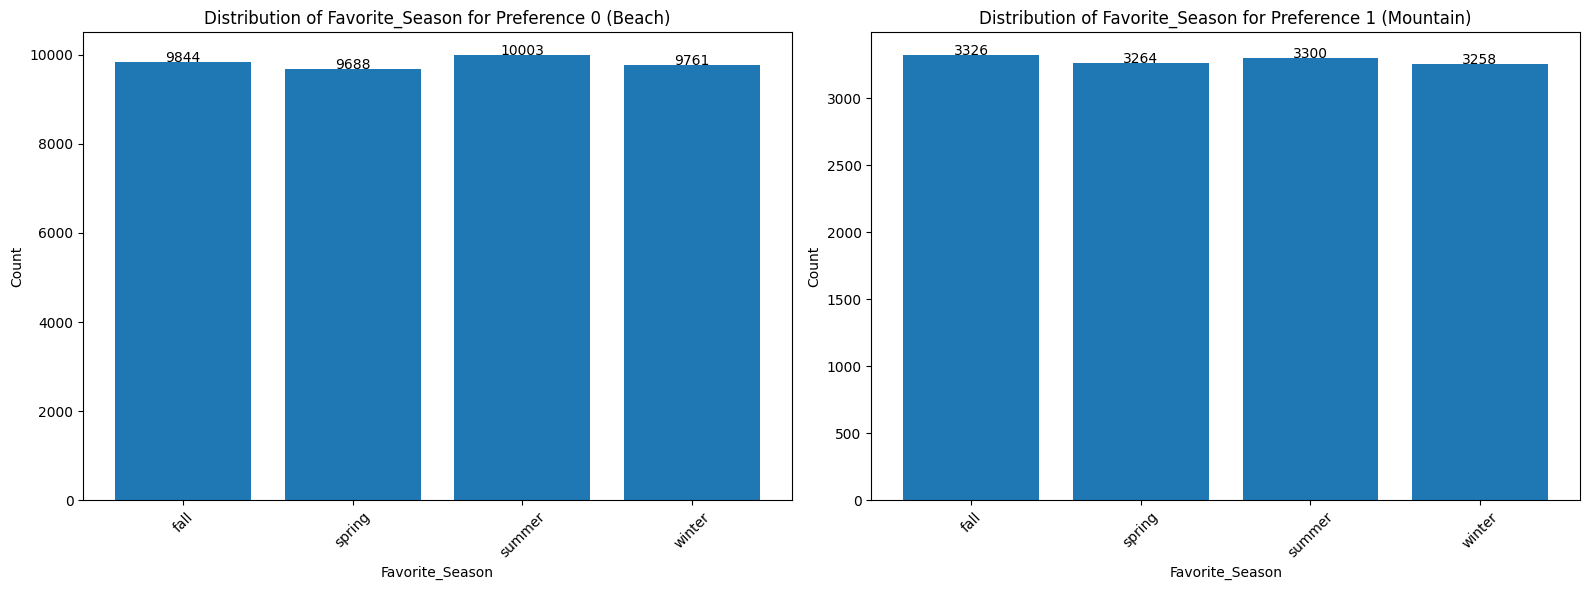

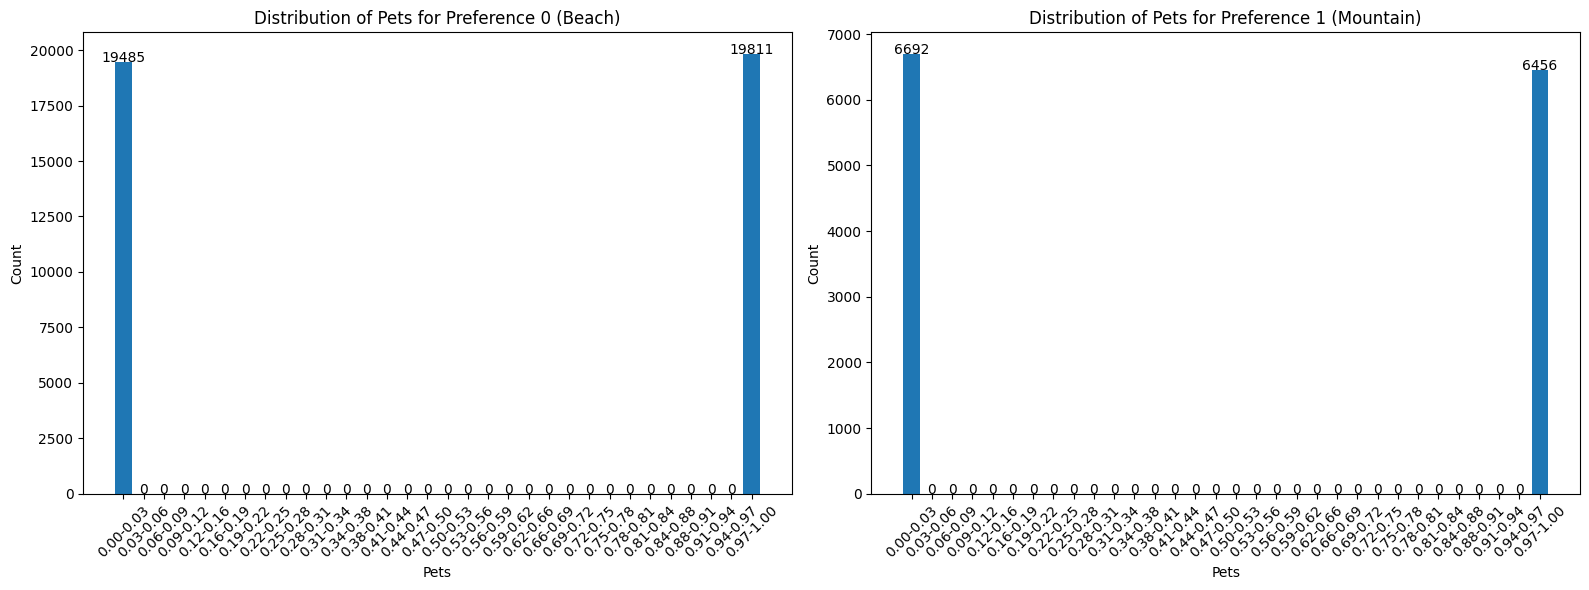

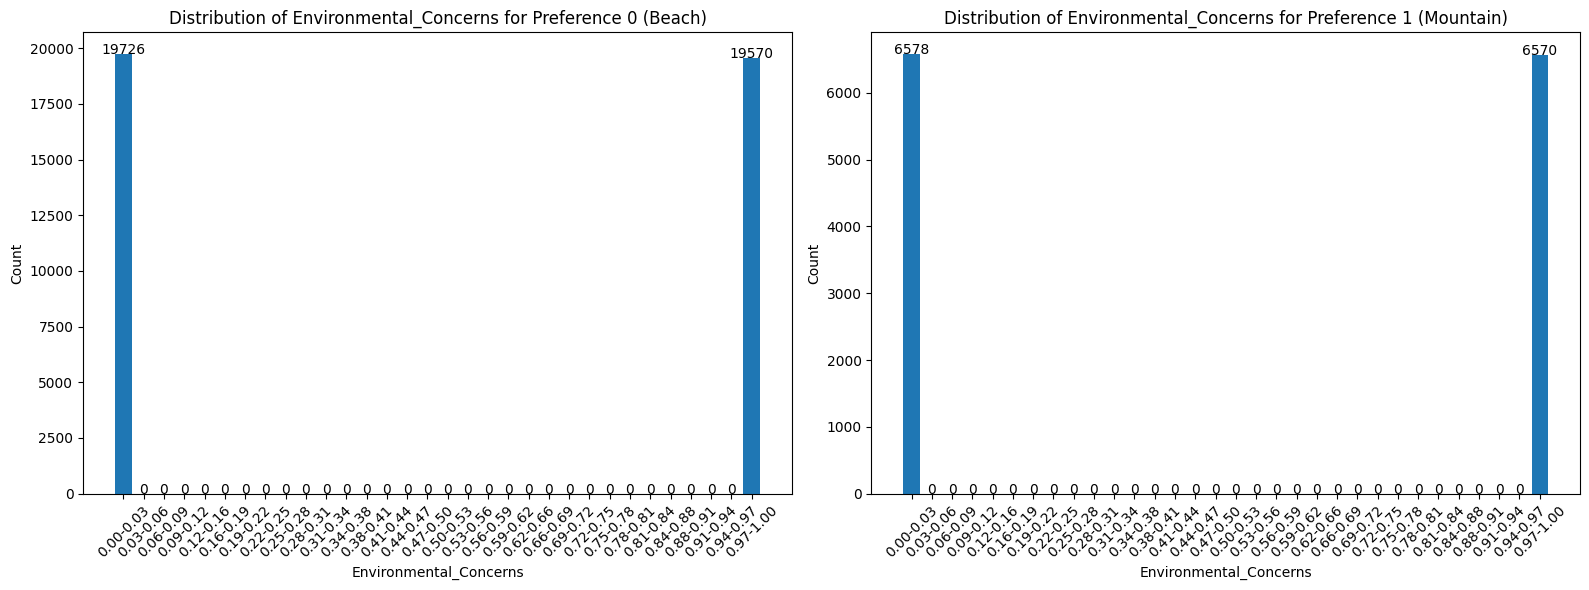

In [8]:
# List of columns to plot
columns_to_plot = df.columns.tolist()
columns_to_plot.remove('Preference')

# Create charts for each column
for column in columns_to_plot:
    create_preference_bar_charts(df, column, num_bins=32)  # Adjust num_bins as needed

These Graphs compare the values of a feature when the Preference is 0(beach) and 1(mountain).  The ratio between the features for the mountain than the beaches is similar and for most part but do not show significate variablity.
The game did show some more signficant diffrence between values, but in terms of ratio there was no difference between beach or mountain. The graph of relating age there was a trend that individuals would take a vaction every other year,

The features showed significant variablity and whose ratios were close to inversive were **Preferred_Activities**, **Proximity_to_Mountains** and **Proximity_to_Beaches**.
The data shows that if the Prefered activity is either swimming or sunbathing then a individual would always choose the beach. But if the preferred actvity is hiking or skiing the preference could be the mountains or the beach. Therefore there needs to be a data feature that will explain why when the preference of skiing and hiking can be both. Also even though the beach was exclusively swimming or sunbathing, there is no guarantee  that the new data will be swimming or sunbathing and the preference will be the beach. There needs to be another feature. The only two remaining graphs with legitimate difference is proximity to the mountains or the beach.



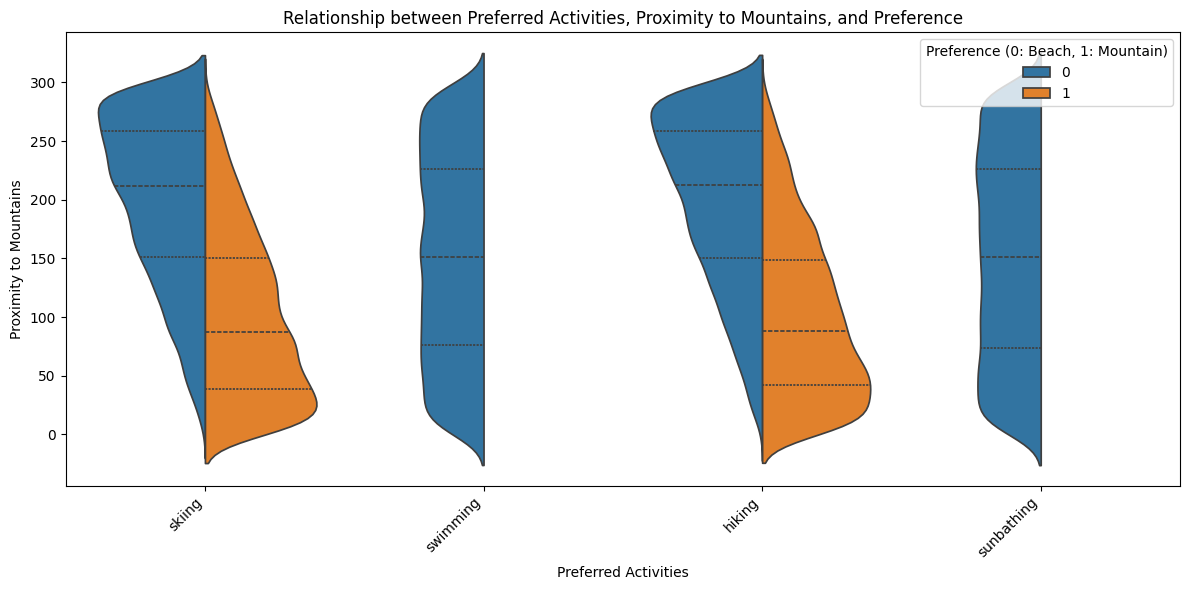

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.violinplot(x='Preferred_Activities', y='Proximity_to_Mountains', hue='Preference', data=df, split=True, inner="quart")

plt.title('Relationship between Preferred Activities, Proximity to Mountains, and Preference')
plt.xlabel('Preferred Activities')
plt.ylabel('Proximity to Mountains')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Preference (0: Beach, 1: Mountain)')
plt.tight_layout()
plt.show()

When Proximity of the mountains increases, there is an higher chance that the preference is the beach. The graph below shows the same idea. When the proximity to the beaches increases there is a higher chance that the preference is the Mountains. When the proximity to the mountain increases there is a higher chance the preference is the beach.

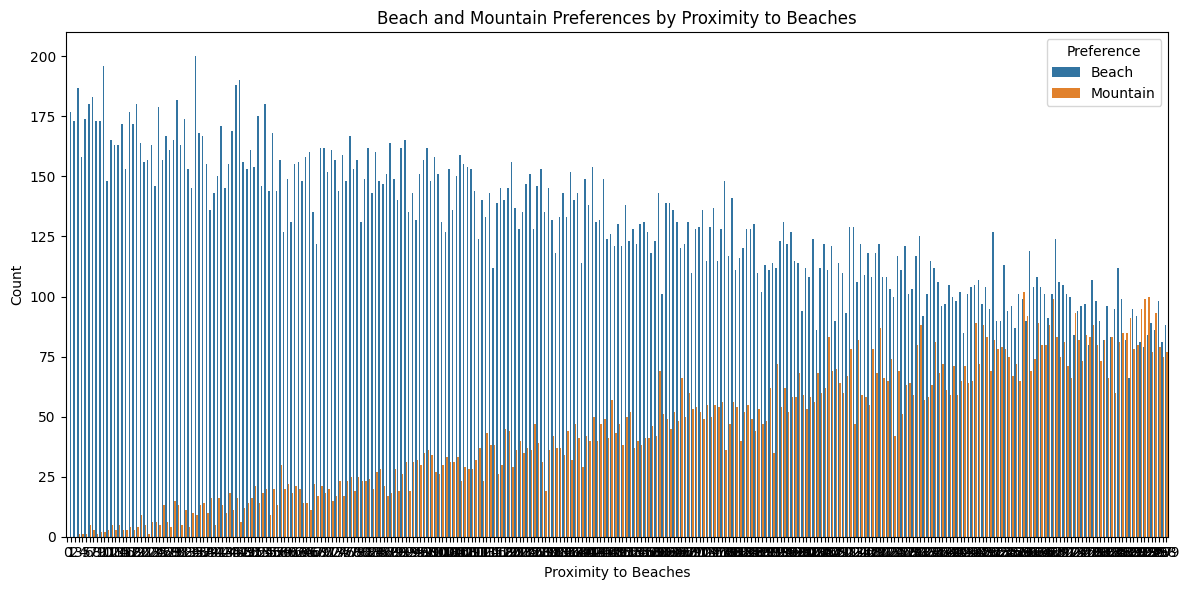

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new column for preference labels
df['Preference_Label'] = df['Preference'].map({0: 'Beach', 1: 'Mountain'})

# Group data by proximity to beaches and preference label, and calculate counts
grouped_data = df.groupby(['Proximity_to_Beaches', 'Preference_Label'])['Preference'].count().reset_index(name='Count')

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Proximity_to_Beaches', y='Count', hue='Preference_Label', data=grouped_data)

plt.title('Beach and Mountain Preferences by Proximity to Beaches')
plt.xlabel('Proximity to Beaches')
plt.ylabel('Count')
plt.legend(title='Preference')
plt.tight_layout()
plt.show()

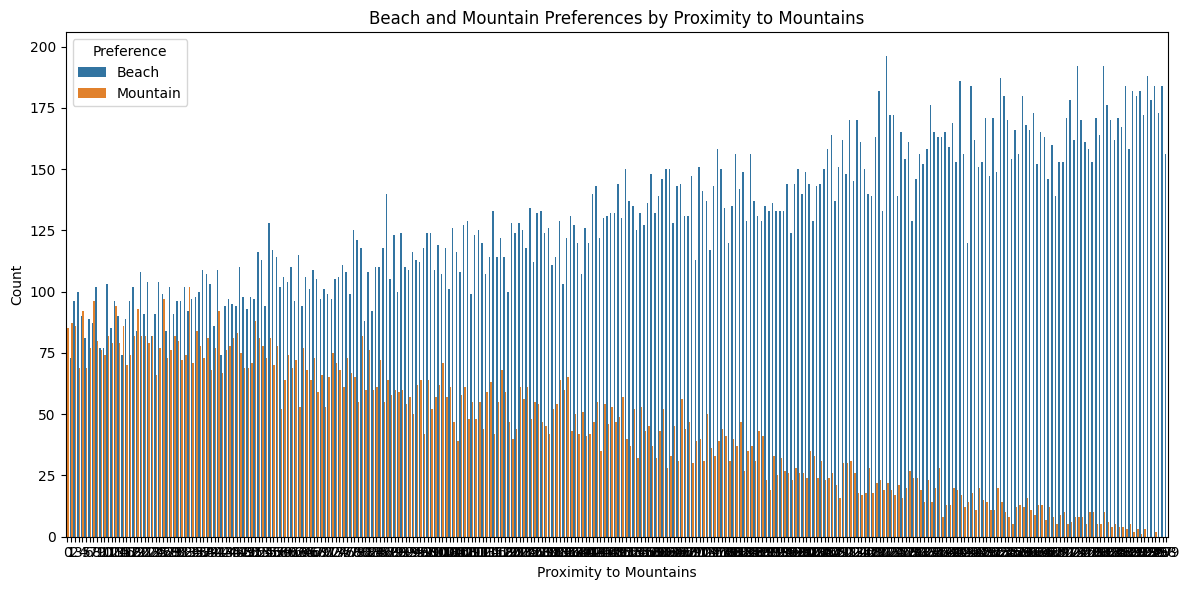

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new column for preference labels (this part remains the same)
df['Preference_Label'] = df['Preference'].map({0: 'Beach', 1: 'Mountain'})

# Group data by proximity to mountains and preference label, and calculate counts
grouped_data = df.groupby(['Proximity_to_Mountains', 'Preference_Label'])['Preference'].count().reset_index(name='Count')

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Proximity_to_Mountains', y='Count', hue='Preference_Label', data=grouped_data)

plt.title('Beach and Mountain Preferences by Proximity to Mountains')
plt.xlabel('Proximity to Mountains')
plt.ylabel('Count')
plt.legend(title='Preference')
plt.tight_layout()
plt.show()

These are the only features that show a distinct decline or incline, the other features do not show signficant levels of inclining or decling the next step is to find the variables that determine what makes the preferred activity hiking and skiing be either beach or mountain without effecting the swimming and sunbathing too much.

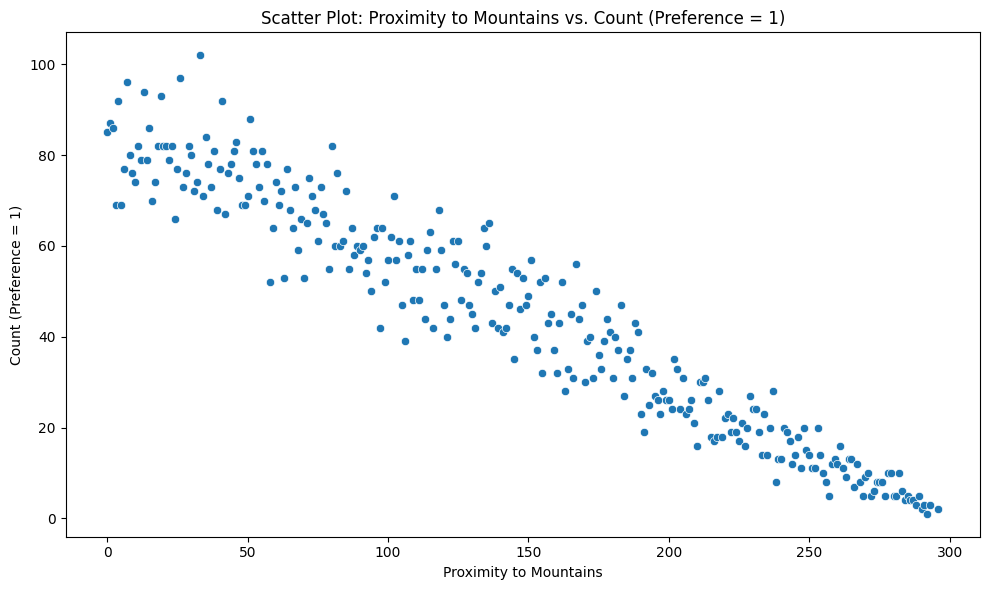

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for preference = 1 (mountain preference)
mountain_preference_df = df[df['Preference'] == 1]

# Group data by proximity to mountains and calculate count
grouped_data = mountain_preference_df.groupby('Proximity_to_Mountains')['Preference'].count().reset_index(name='Count')

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='Proximity_to_Mountains', y='Count', data=grouped_data)

plt.title('Scatter Plot: Proximity to Mountains vs. Count (Preference = 1)')
plt.xlabel('Proximity to Mountains')
plt.ylabel('Count (Preference = 1)')
plt.tight_layout()
plt.show()

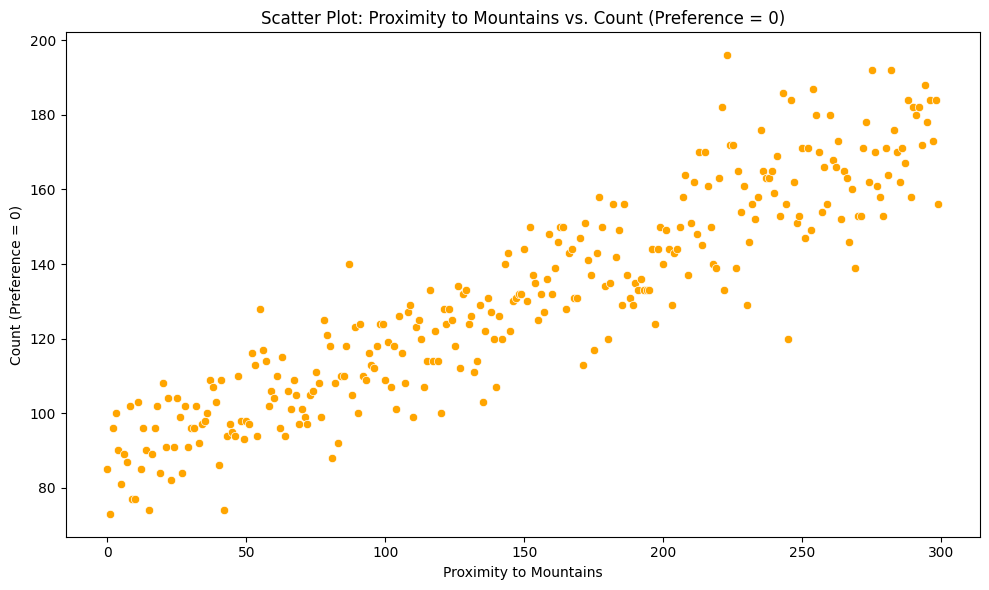

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for preference = 0 (beach preference)
beach_preference_df = df[df['Preference'] == 0]

# Group data by proximity to mountains and calculate count
grouped_data = beach_preference_df.groupby('Proximity_to_Mountains')['Preference'].count().reset_index(name='Count')

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='Proximity_to_Mountains', y='Count', data=grouped_data, color='orange')

plt.title('Scatter Plot: Proximity to Mountains vs. Count (Preference = 0)')
plt.xlabel('Proximity to Mountains')
plt.ylabel('Count (Preference = 0)')
plt.tight_layout()
plt.show()

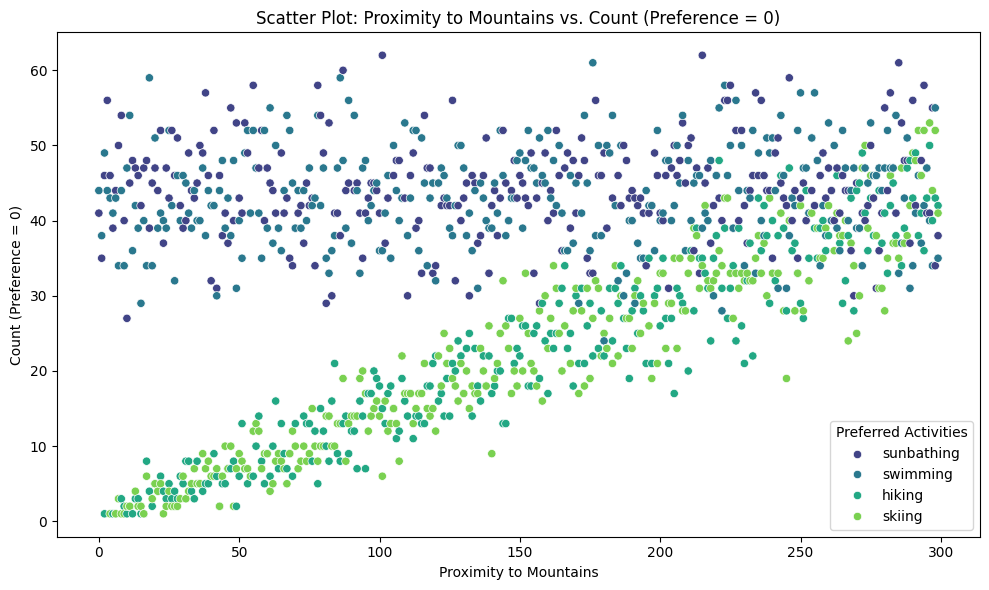

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for preference = 0 (beach preference)
beach_preference_df = df[df['Preference'] == 0]

# Group data by proximity to mountains and preferred activity, and calculate count
grouped_data = beach_preference_df.groupby(['Proximity_to_Mountains', 'Preferred_Activities'])['Preference'].count().reset_index(name='Count')

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='Proximity_to_Mountains', y='Count', hue='Preferred_Activities', data=grouped_data, palette='viridis')  # Use 'palette' for custom colors

plt.title('Scatter Plot: Proximity to Mountains vs. Count (Preference = 0)')
plt.xlabel('Proximity to Mountains')
plt.ylabel('Count (Preference = 0)')
plt.legend(title='Preferred Activities')  # Add a legend
plt.tight_layout()
plt.show()

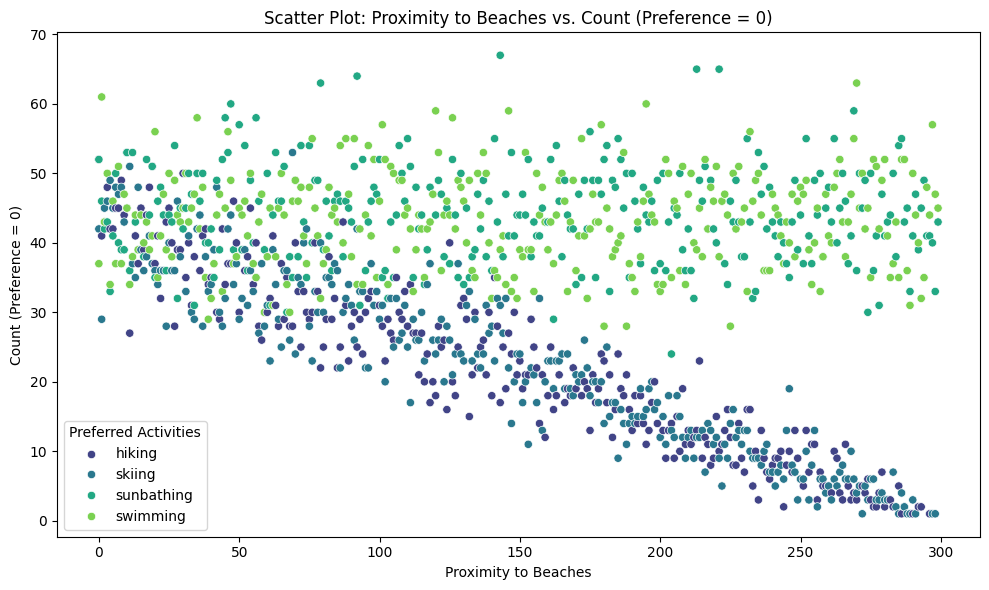

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for preference = 0 (beach preference)
beach_preference_df = df[df['Preference'] == 0]

# Group data by proximity to beaches and preferred activity, and calculate count
grouped_data = beach_preference_df.groupby(['Proximity_to_Beaches', 'Preferred_Activities'])['Preference'].count().reset_index(name='Count')

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='Proximity_to_Beaches', y='Count', hue='Preferred_Activities', data=grouped_data, palette='viridis')  # Use 'palette' for custom colors

plt.title('Scatter Plot: Proximity to Beaches vs. Count (Preference = 0)')
plt.xlabel('Proximity to Beaches')
plt.ylabel('Count (Preference = 0)')
plt.legend(title='Preferred Activities')  # Add a legend
plt.tight_layout()
plt.show()

In the four graphs above it shows that same trend that proximity shows a strong covariance. When the preferred activity is added to the data, it creates a weak covariance compared to the other graphs that display only proximity and count. Therefore I will focus on solely the proximity as the key feature. The first model that I plan to create is logistic classification.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'df'

# Select the feature and target variable
X = df[['Proximity_to_Beaches']]  # Feature
y = df['Preference']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7465916674611498


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'df'

# Select the feature and target variable
X = df[['Proximity_to_Beaches']]  # Feature
y = df['Preference']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7482124130040996


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'df'

# Select the feature and target variable
X = df[['Proximity_to_Beaches']]  # Feature
y = df['Preference']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7494518066545905


After trying the only feature is proxomity_to_beach the model type does not matter. Time to change the features.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'df'

# Select the features and target variable
X = df[['Proximity_to_Beaches', 'Proximity_to_Mountains']]  # Features
y = df['Preference']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7525026217942606


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'df'

# Select the features and target variable
X = df[['Proximity_to_Beaches', 'Proximity_to_Mountains']]  # Features
y = df['Preference']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7510725521975403


There is not a significant difference when adding proximity to mountains to the feature, back to the drawing board.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder  # For encoding 'preferred_activities'

# Assuming your DataFrame is named 'df'

# 1. Prepare the data:

# Select features and target
X = df[['Proximity_to_Beaches', 'Proximity_to_Mountains', 'Preferred_Activities']]
y = df['Preference']

# One-hot encode 'Preferred_Activities'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for array output
encoded_activities = encoder.fit_transform(X[['Preferred_Activities']])
encoded_df = pd.DataFrame(encoded_activities, columns=encoder.get_feature_names_out(['Preferred_Activities']))

# Concatenate encoded features with numerical features
X = pd.concat([X[['Proximity_to_Beaches', 'Proximity_to_Mountains']], encoded_df], axis=1)

# 2. Split data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model:
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# 4. Make predictions and evaluate:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9984745924301649


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Assuming your DataFrame is named 'df'

# 1. Prepare the data:

# Select features and target
X = df[['Proximity_to_Beaches', 'Proximity_to_Mountains', 'Preferred_Activities']]
y = df['Preference']

# One-hot encode 'Preferred_Activities'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_activities = encoder.fit_transform(X[['Preferred_Activities']])
encoded_df = pd.DataFrame(encoded_activities, columns=encoder.get_feature_names_out(['Preferred_Activities']))

# Concatenate encoded features with numerical features
X = pd.concat([X[['Proximity_to_Beaches', 'Proximity_to_Mountains']], encoded_df], axis=1)

# 2. Split data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model:
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
model.fit(X_train, y_train)

# 4. Make predictions and evaluate:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9957097912098388


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Assuming your DataFrame is named 'df'

# 1. Prepare the data:

# Select features and target
X = df[['Proximity_to_Beaches', 'Proximity_to_Mountains', 'Preferred_Activities']]
y = df['Preference']

# One-hot encode 'Preferred_Activities'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_activities = encoder.fit_transform(X[['Preferred_Activities']])
encoded_df = pd.DataFrame(encoded_activities, columns=encoder.get_feature_names_out(['Preferred_Activities']))

# Concatenate encoded features with numerical features
X = pd.concat([X[['Proximity_to_Beaches', 'Proximity_to_Mountains']], encoded_df], axis=1)

# 2. Split data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the model:
model = GradientBoostingClassifier(random_state=42)  # You can adjust hyperparameters here
model.fit(X_train, y_train)

# 4. Make predictions and evaluate:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.995042425398036


Clearly using the features Proximity_to_Mountains, Proximity_to_Mountains, and preferred_activity determines if an individual wants to go to the beach or mountains. Although by a fraction the logistical regression had the highest accuracy at 0.9984745924301649 had an accuracy of 0.995042425398036.